# Deploying Maching Learning and Data Science Projects as Public Web Applications

## How to take data science code from the development platform and publish it online

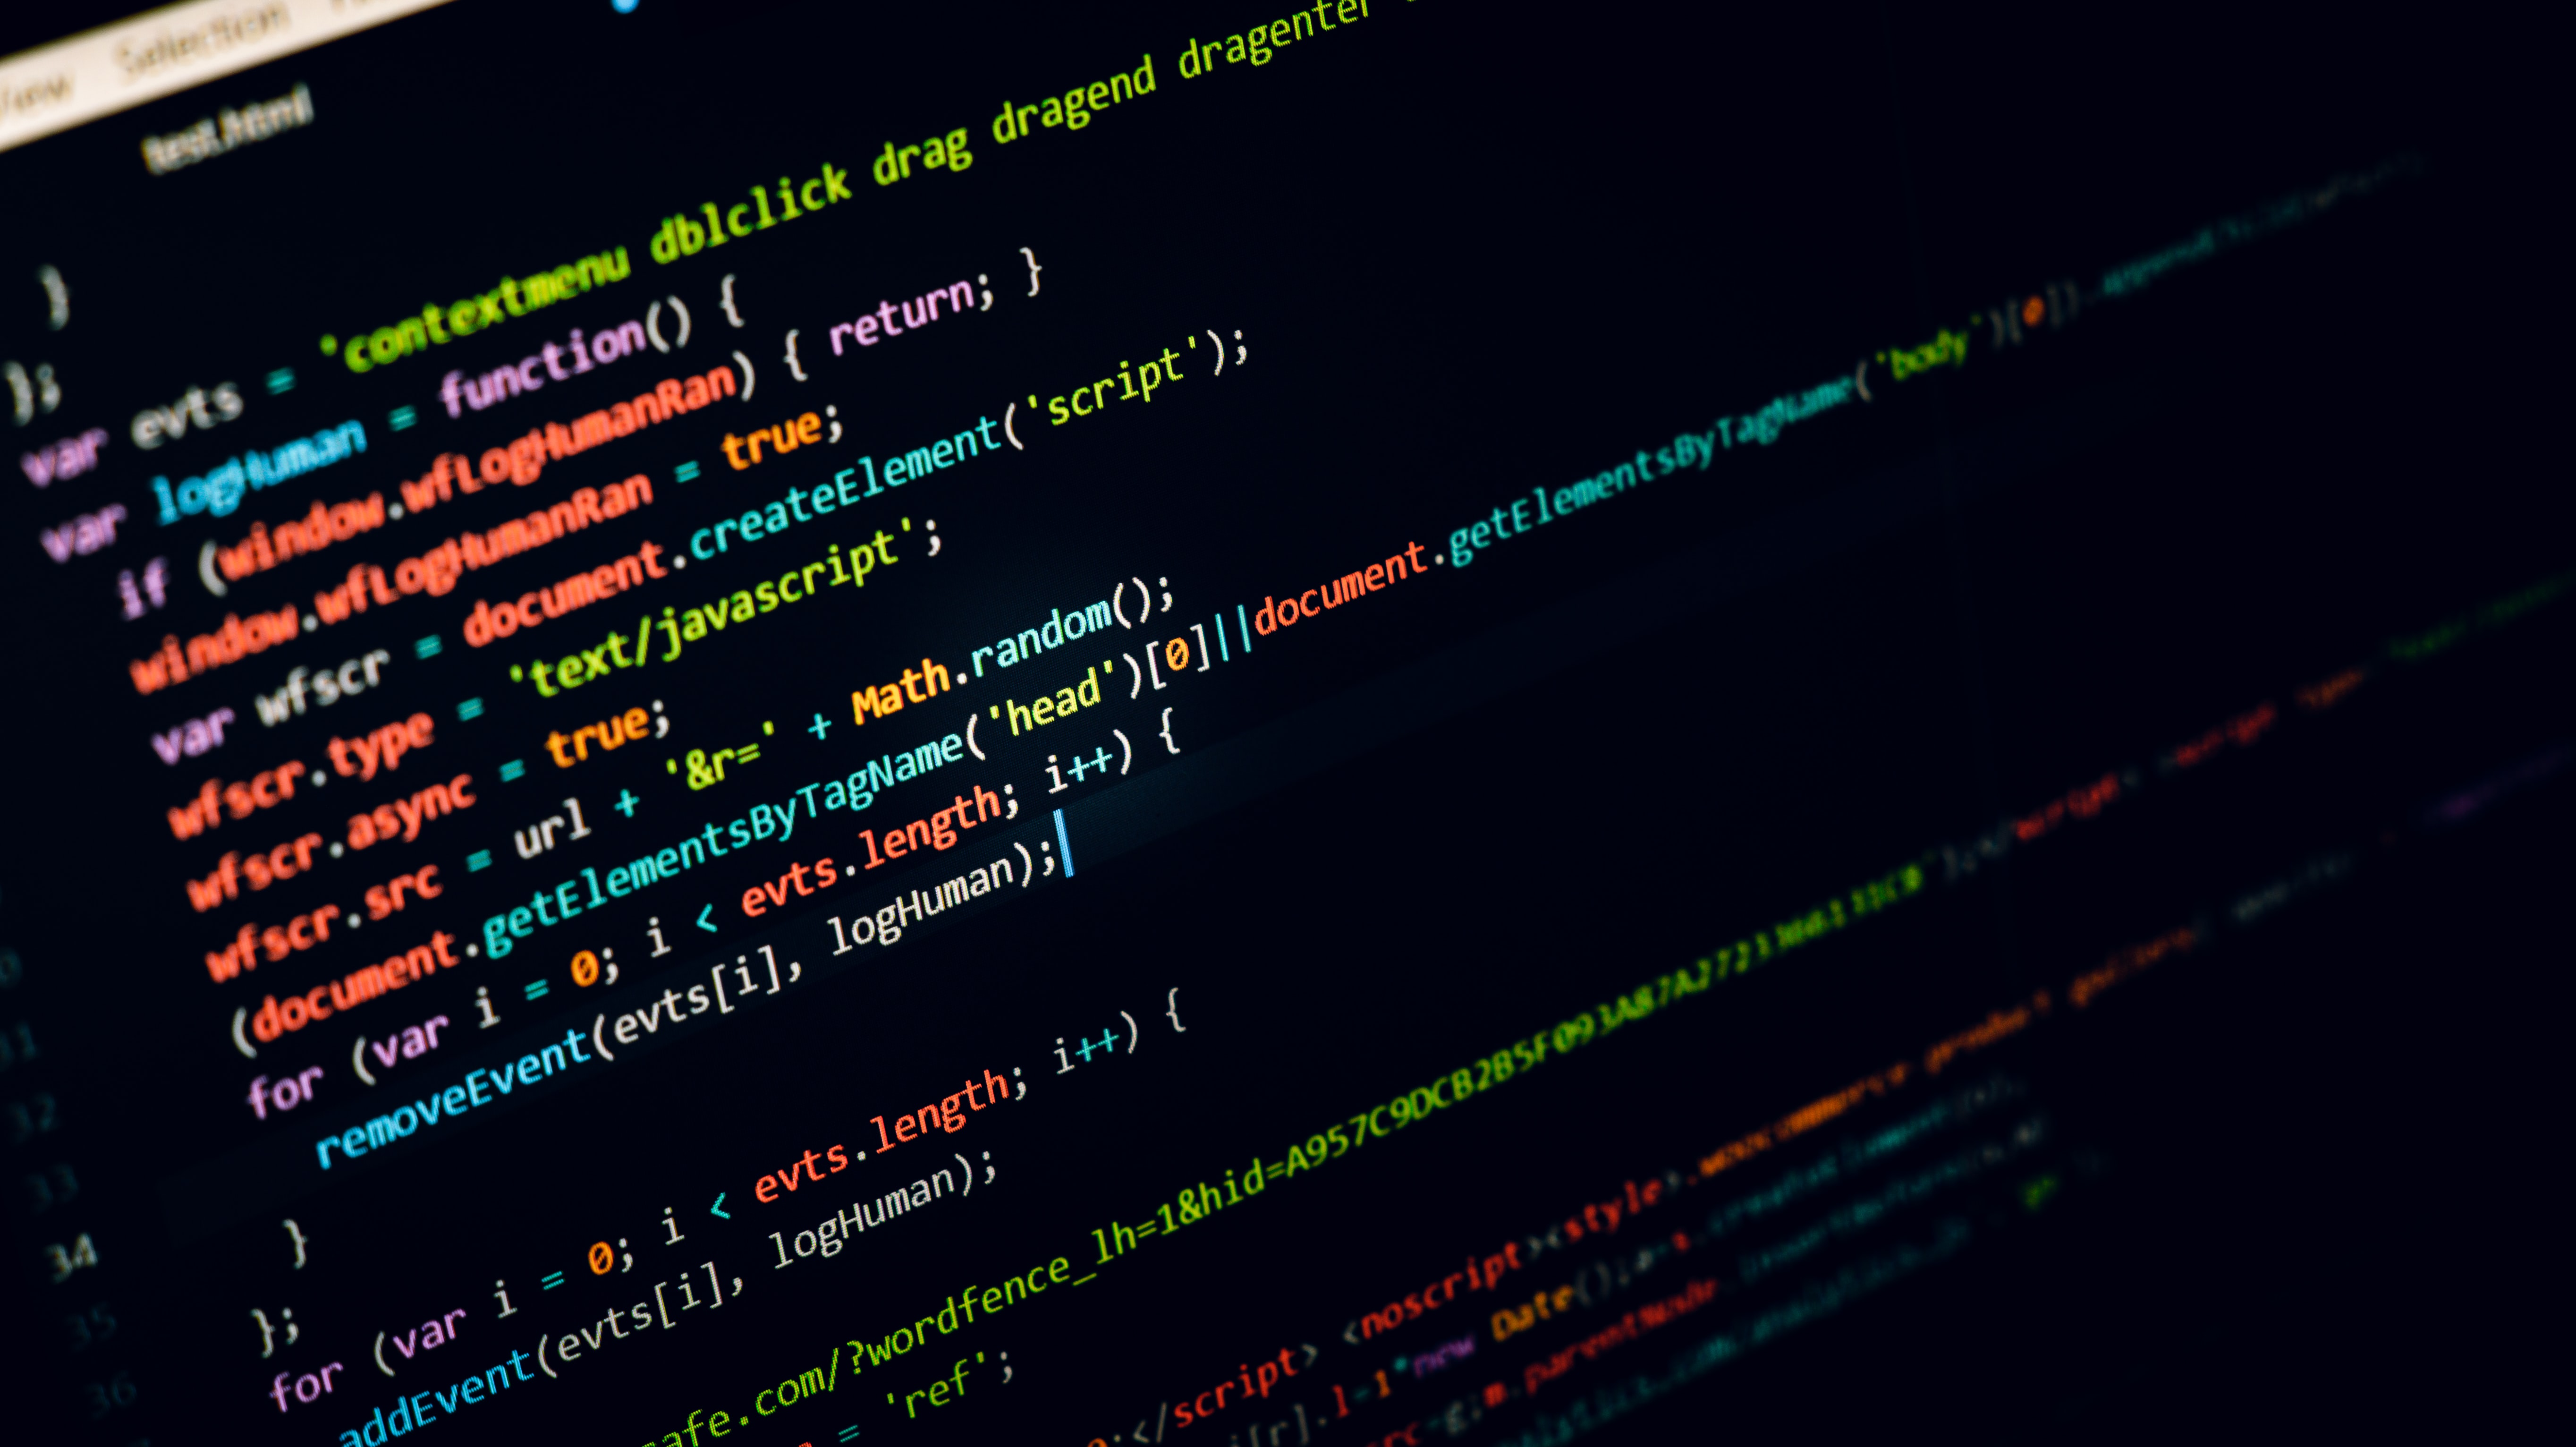
Photo by <a href="https://unsplash.com/@dlanor_s?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">RoonZ</a> on <a href="https://unsplash.com/s/photos/deploy-code?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Introduction

Many useful machine learning and data science applications are developed in the Jupyter Notebook environment, but when they are complete and ready to share with internal customers or the external data science community how can those notebooks be sharted?

There are many different ways to achieve this but this article explains how to deploy Jupyter Notebooks using voila and mybinder and this approach is used because it is fast, effective and free.

There are a few nuances in the configuration and setup and the rest of the article explains how to achieve this deplyoment in easy-to-follow steps with detailed explanations and screen-shots ...

### Step 1: Write an "App" in a JupyterNotebook

The first step is to write an "app" in a Jupyter Notebook that can be displayed or rendered in such a way that a user can interact with it.

Most data scientists are more familiar with writing machine learning algorithms than web applications but fortunately there is an easy-to-use library that enables Jupyter Notebooks to be delivered as web applications and that is IPython widgets (ipywidgets).

Explaining how to create an interactive app using ipywidgets is beyond the scope of this article but there is a set of excellen documentation available online to get you started - https://ipywidgets.readthedocs.io/en/stable/user_guide.html

#### Step 1a: Creating an Example App

We are going to need an app that uses ipywidgets to use in this example and for that I have modified a Notebook I wrote about in a previous article that calculates confidence intervals for normal and binomial distributions.

If you want to check out that article, which contains all the details and explanations, please have a look at this link - https://towardsdatascience.com/how-to-build-an-interactive-confidence-interval-calculator-in-python-6aea08d69be3

In the mean-time, here is the modified code that is going to be used for our example -

In [1]:
# Imports ...
from ipywidgets import Label, FloatSlider, FloatText, BoundedIntText, Button, Output, VBox, HBox

import scipy.stats as stats
import numpy as np

# Helpder functions to calculate the confidence intervals ...
def normal_distribution_ci(confidence, x_bar, sigma, n):
    z_score = stats.norm.interval(confidence)[1]
    sigma_over_root_n = sigma / np.sqrt(n)
    ci = [x_bar - z_score * sigma_over_root_n, x_bar + z_score * sigma_over_root_n]
    return ci

def binomial_distribution_ci(confidence, p_hat, n):
    z_score = stats.norm.interval(confidence)[1]
    rhs = z_score * np.sqrt(p_hat*(1-p_hat))/n
    ci = [p_hat - rhs, p_hat + rhs]
    return ci

# IPython widget controls for confidence intervals of normal and binomial distributions ...
normal_label = Label("Normal Distribution Confidence Interval Calculator")
normal_confidence = FloatSlider(description="confidence", value=0.95, min=0.5, max=0.99, step=0.01)
normal_x_bar_input = FloatText(value=75.7, min=0, max=100000, step=0.01, description='x bar:', disabled=False)
normal_sigma_input = FloatText(value=7.3, min=0, max=100000, step=1, description='sigma:', disabled=False)
normal_n_input = BoundedIntText(value=30, min=0, max=100000, step=1, description='n:', disabled=False)
normal_button = Button(description="Calculate")
normal_output = Output()

binomial_label = Label("Binomial Distribution Confidence Interval Calculator")
binomial_confidence = FloatSlider(description="confidence", value=0.95, min=0.5, max=0.99, step=0.01)
binomial_phat = FloatSlider(description="p hat", value=0.78, min=0.0, max=1.0, step=0.01)
binomial_n_input = BoundedIntText(value=30, min=0, max=100000, step=1, description='n:', disabled=False)
binomial_button = Button(description="Calculate")
binomial_output = Output()

# Button click event handlers ...
def normal_button_on_click(b):
    ci = normal_distribution_ci(normal_confidence.value, normal_x_bar_input.value, normal_sigma_input.value, normal_n_input.value)
    
    normal_output.clear_output()
    with normal_output:
        print(f"The population mean lies between {ci[0]:.2f} and {ci[1]:.2f} with {normal_confidence.value:.0%} confidence")
        
def binomial_button_on_click(b):
    ci = binomial_distribution_ci(binomial_confidence.value, binomial_phat.value, binomial_n_input.value)
    
    binomial_output.clear_output()
    with binomial_output:
        print(f"The population mean lies between {ci[0]:.1%} and {ci[1]:.1%} with {binomial_confidence.value:.0%} confidence")
        
normal_button.on_click(normal_button_on_click)
binomial_button.on_click(binomial_button_on_click)

vbox_normal = VBox([normal_label, normal_confidence, normal_x_bar_input, normal_sigma_input, normal_n_input, normal_button, normal_output])
vbox_binomial = VBox([binomial_label, binomial_confidence, binomial_phat, binomial_n_input, binomial_button, binomial_output])

VBox([vbox_normal, vbox_binomial])

It looks more comlicated than it is as there are separate lines of code for each control, but if you want a detailed explanation of the code just use the link to my previous article - https://towardsdatascience.com/how-to-build-an-interactive-confidence-interval-calculator-in-python-6aea08d69be3

### Step 2: Deply the App Locally

We now have some data science code to calculate confidence intervals that renders inside a Jupyter Notebook. The output is reasonably well organised and it works quite nicely, but there are a few problems -

1. If we want to distribute it to users, those users have to have access to the Jupyter Notebook environment.
2. The code is all mixed up in the "App" which may confuse users who just want to use the calculator and are not concerned with how it is implemented.

This is where the Voilà Jupyter server extension comes in. 

Once Voilà is installed it will run a Notebook just like Jupyter does but with one important difference. It strips out all of the cell inputs and leaves just the outputs which include ipywidgets and markdown. In this way the python code is removed and what is left is a fully functioning web app.

Voilà must be installed as follows -

1. Install the voila libraries by running ``pip install voila`` from the command line or ``!pip install voila`` from inside a Jupyter Notebook.
2. Enable the extension by running ``jupyter serverextension enable voila –sys-prefix`` either at the command line or with a ``!`` prefix inside a Notebook.
3. Restart your computer, otherwise the new server extension is not picked up and does not start.

Once Voilà is installed and working you can run any Notebook as a web app as follows -

1. Start your Jupyter Notebook application.
2. Edit the URL in the URL bar and replace ``/tree`` with ``/voila`` which should look like this if you are using port 8888 - ``http://localhost:8888/voila`` -

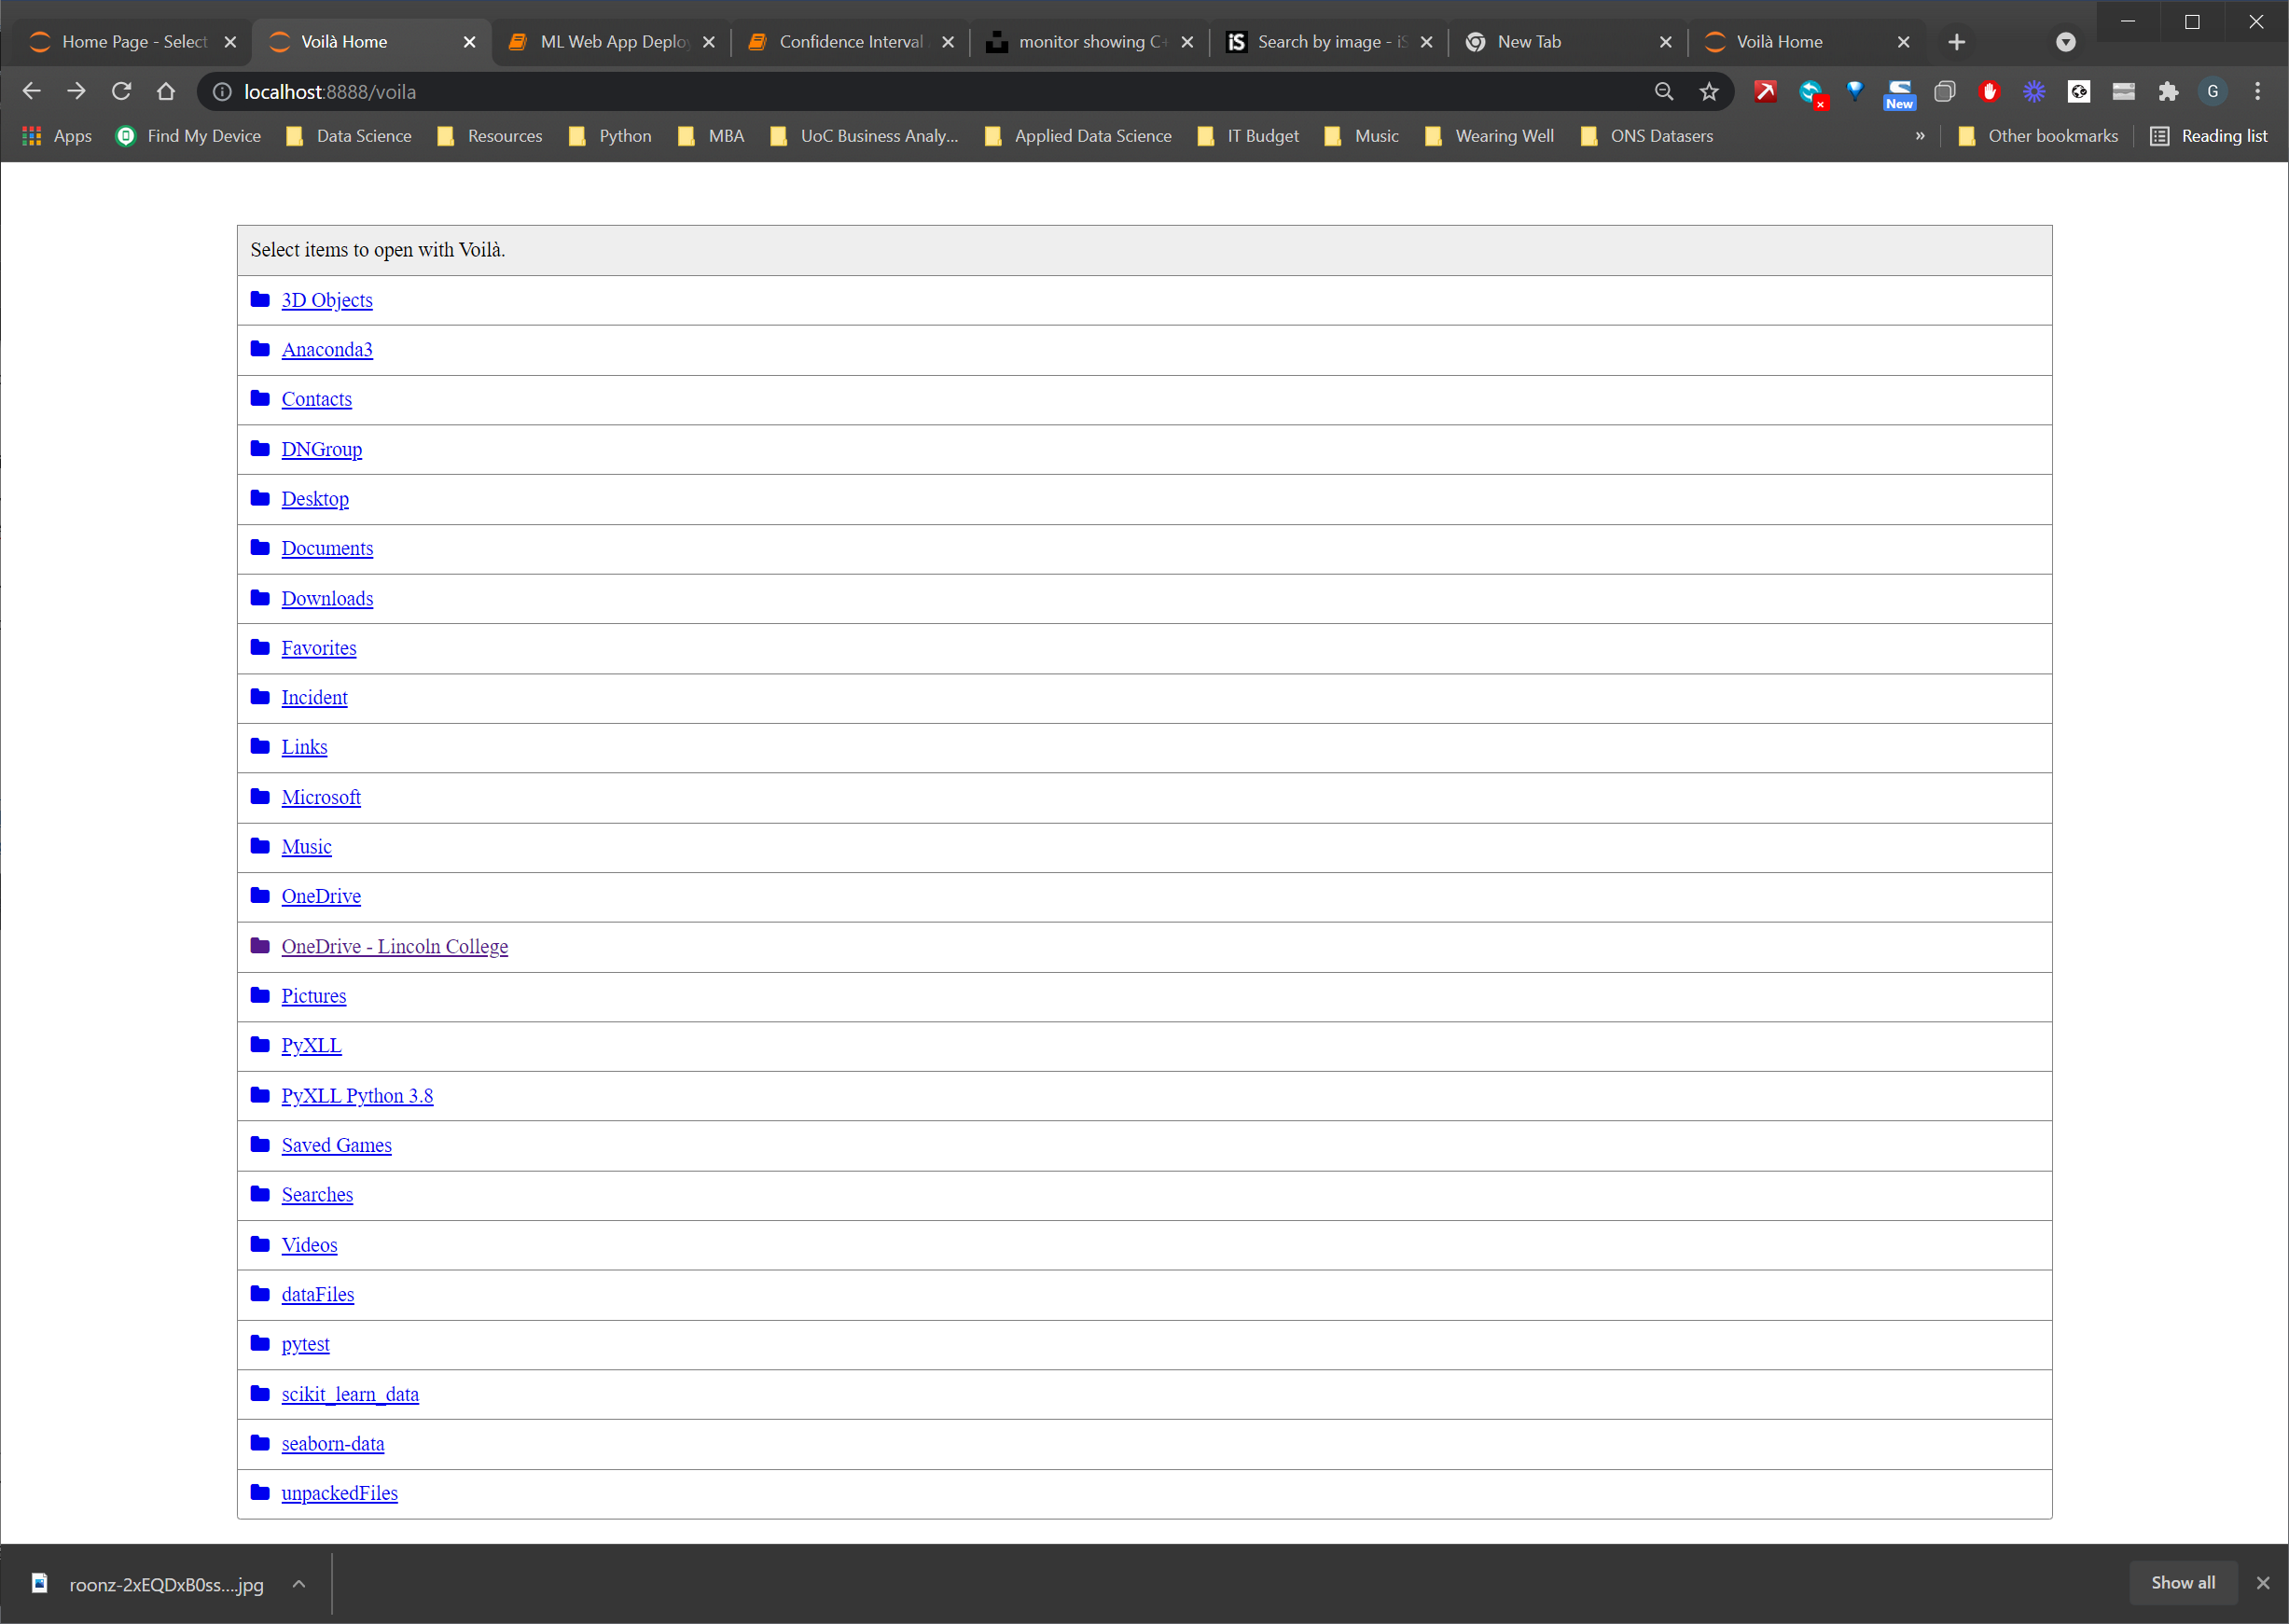
Image by Author

3. Navigate through the folder structure until you find the Notebook you want to run as a web app and click on the .ipynb notebook file.

Your notebook will now render as a fully functioning web application -

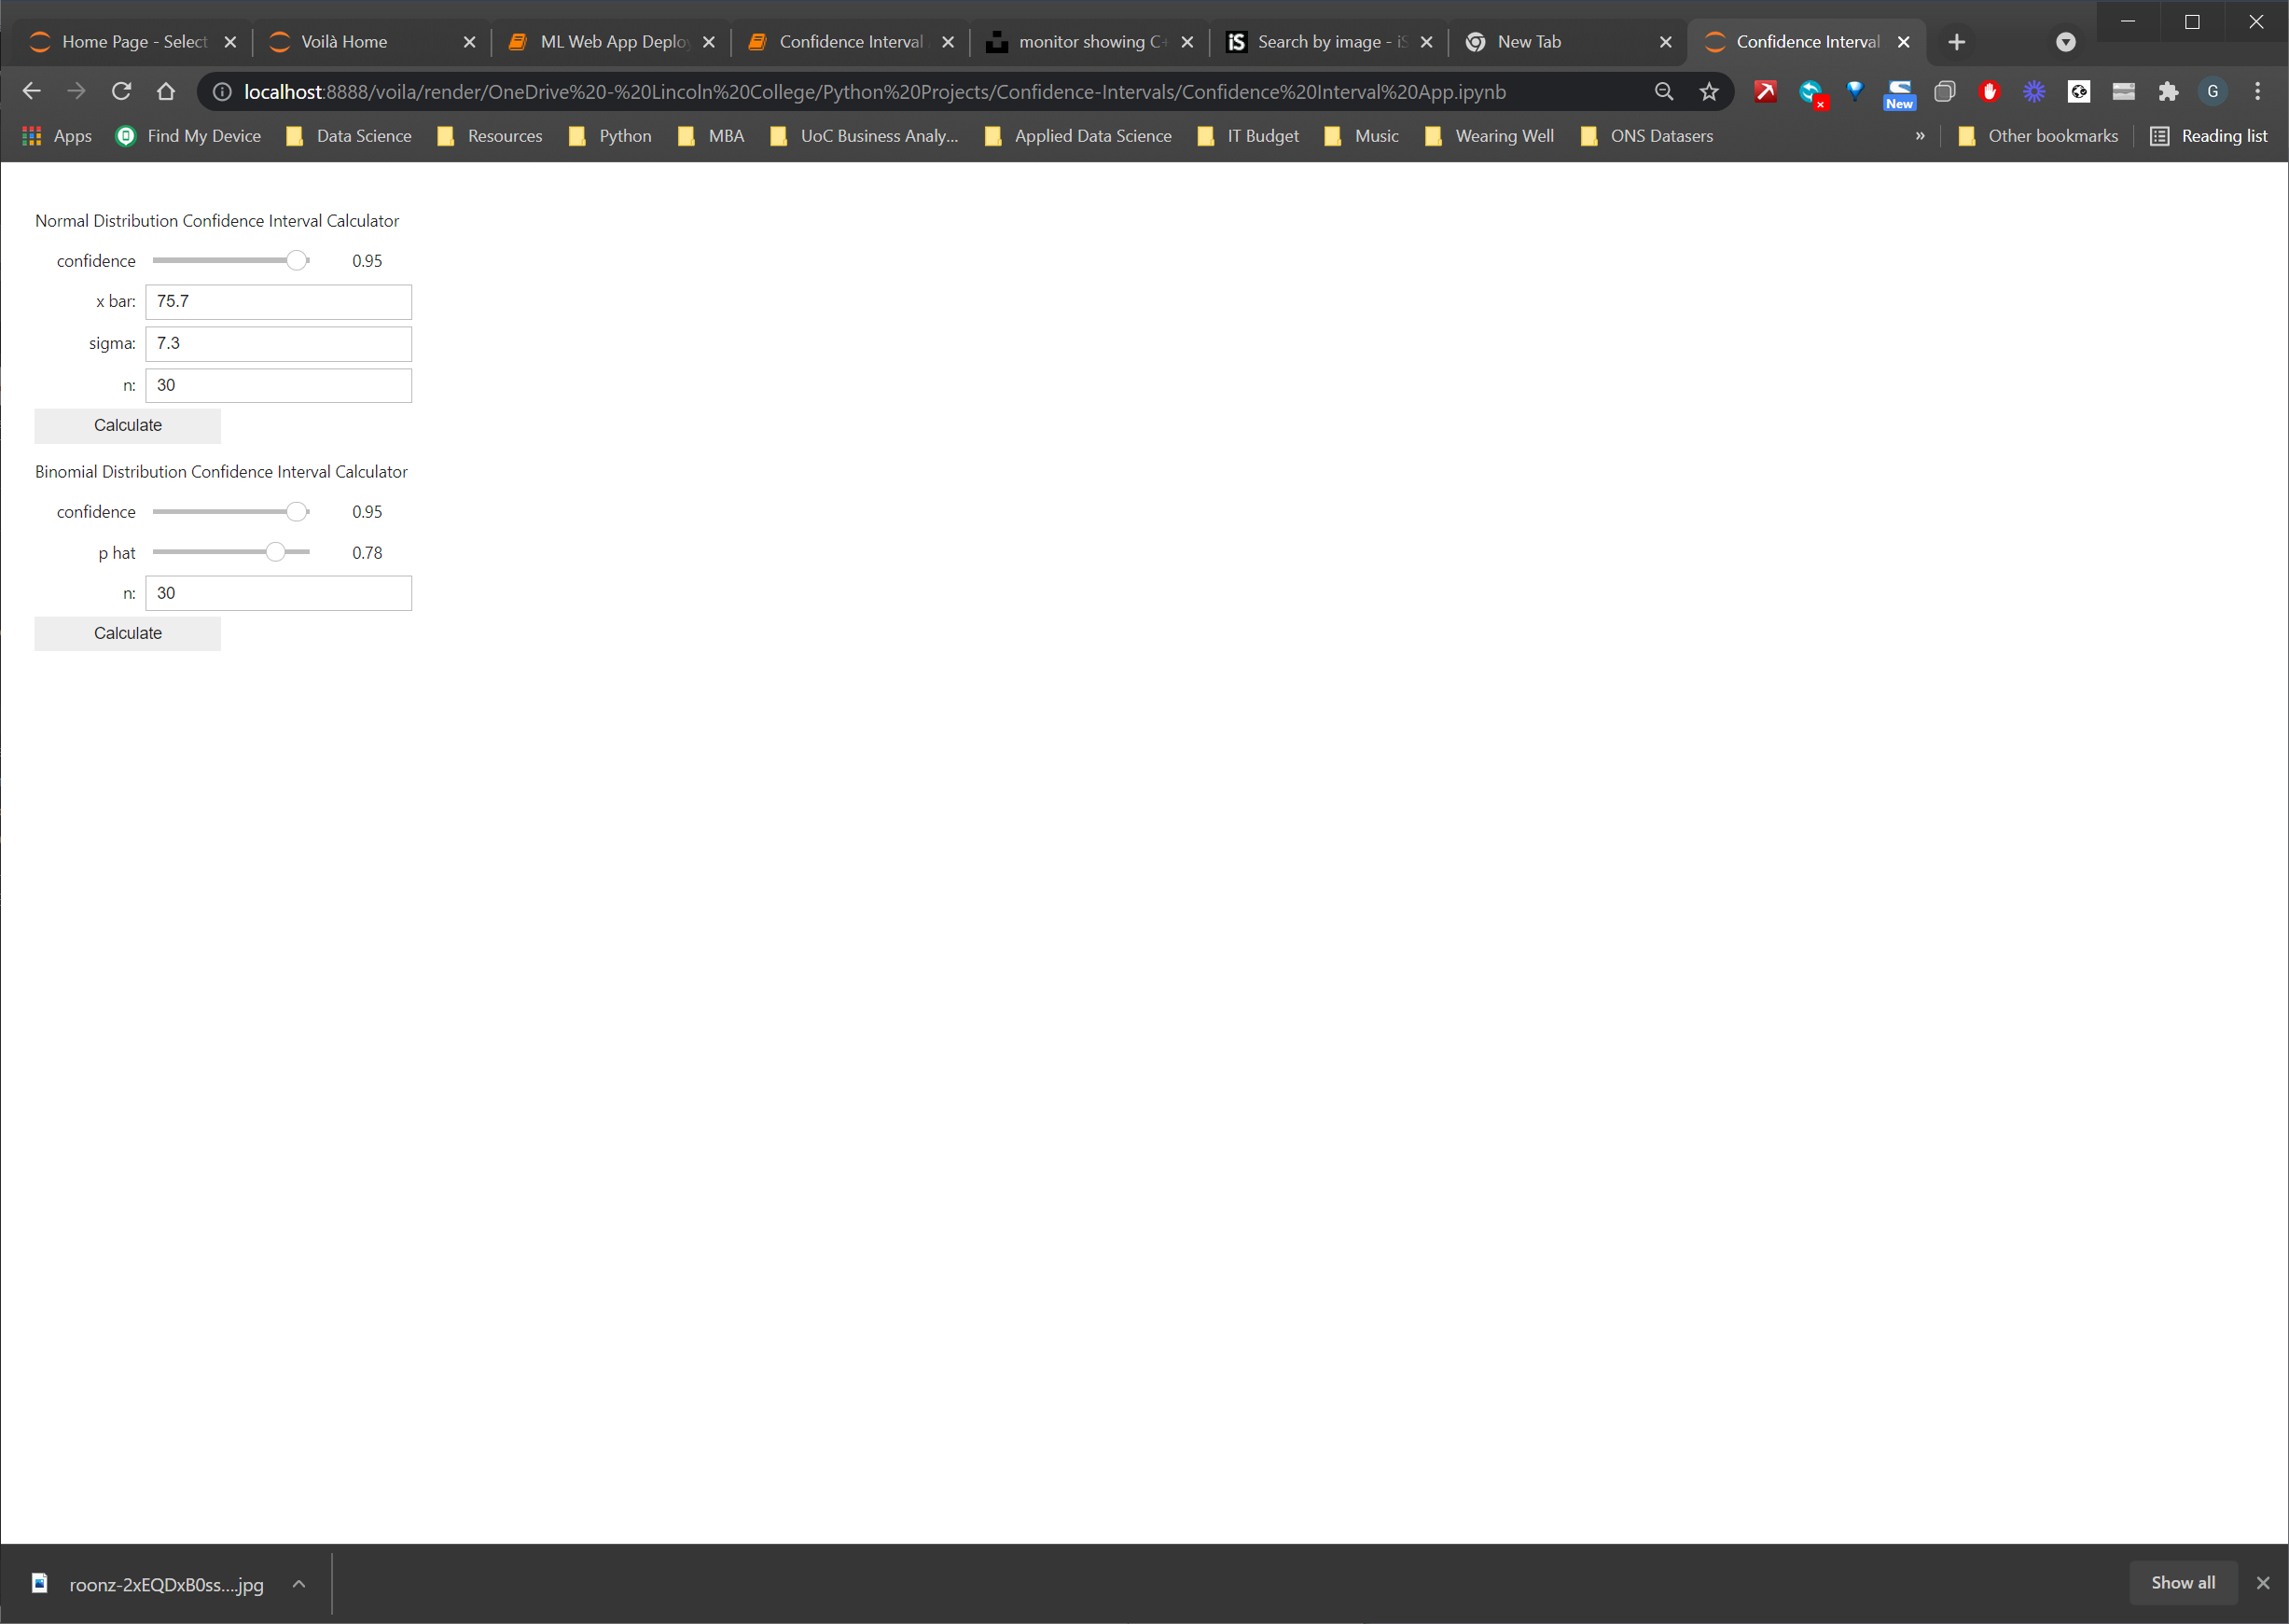
Image by Author

If you would like to review the full documentation for Voilà please use this link - https://voila.readthedocs.io/en/stable/index.html.

Congratulations, you now have a complete, working web app deploying data science code directly into a web browser user interface!

The only issue is that you are the only person in the world who can use it and that defeats the purpose of web apps just a little bit ...

### Step 3: Deploy the App to Github

In order to deploy the app publicly we need to use two further utilities - GitHub and mybinder. GitHub will be used to hold a publicly available repository of the web app source code and mybinder will be used to host the app and its runtime environment and to make a public URL available to users.

There are several ways of creating a GitHub repository. Some data scientists like to do this using the command line but my preference is to use the GitHub desktop application. If you don't already have the desktop application and you would like to follow the next steps exactly you will need t odownload it and install it using this link - https://desktop.github.com/.